Loading Training Data...
Found 69600 images belonging to 29 classes.

Loading Validation Data...
Found 17400 images belonging to 29 classes.

Loading Test Data...
Found 28 images belonging to 1 classes.

Class Indices: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}
Number of classes found: 29

Displaying a batch of augmented training images:


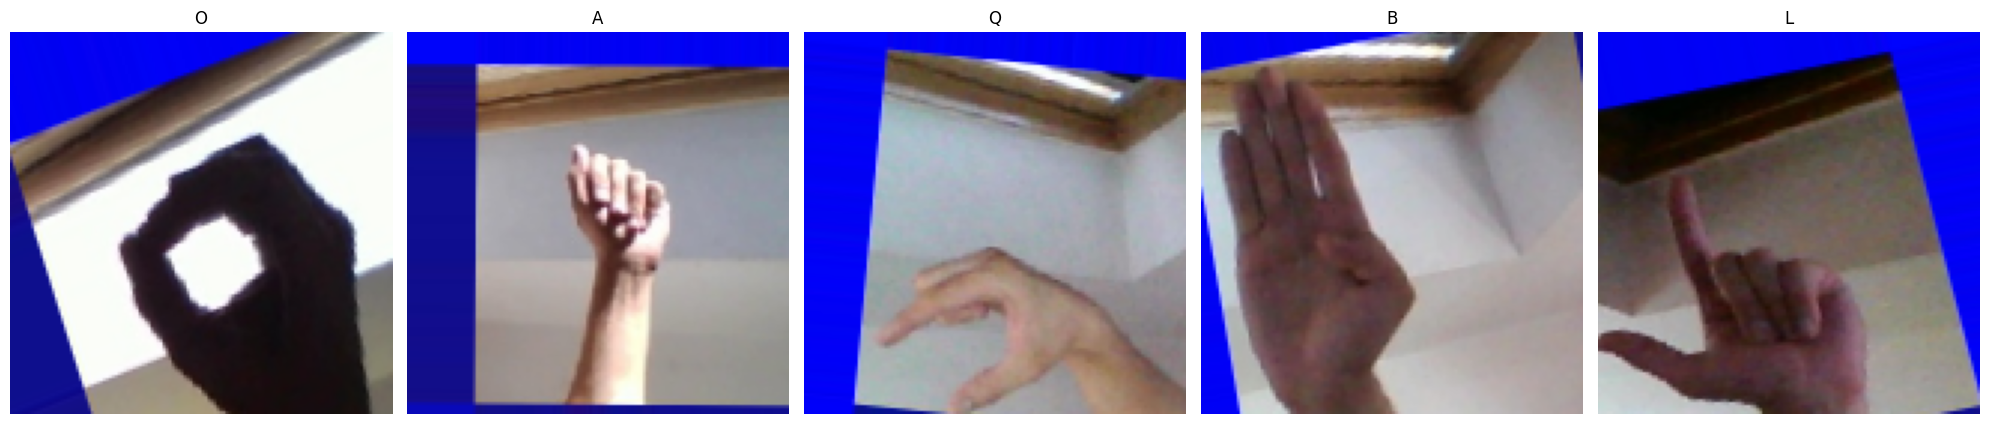

In [18]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# --- Define Paths and Parameters ---

base_dir = '/Users/chandu/MachineLearning_Project/Unified_mentor(internship)/Projects/My_List/ASL_detection/ASL_Data' # Use './' if the notebook is in the same folder as ASL_Data

train_dir = os.path.join(base_dir, '/Users/chandu/MachineLearning_Project/Unified_mentor(internship)/Projects/My_List/ASL_detection/ASL_Data/ASL_Train/asl_alphabet_train')
test_dir = os.path.join(base_dir, '/Users/chandu/MachineLearning_Project/Unified_mentor(internship)/Projects/My_List/ASL_detection/ASL_Data/ASL_Test')

# Define image parameters
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32 # Number of images to process at a time

# --- Create ImageDataGenerator for Preprocessing and Augmentation ---


train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values to be between 0 and 1
    rotation_range=20,           # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,       # Randomly shift images horizontally
    height_shift_range=0.2,      # Randomly shift images vertically
    shear_range=0.2,             # Apply shear transformations
    zoom_range=0.2,              # Randomly zoom in on images
    horizontal_flip=True,        # Randomly flip images horizontally
    fill_mode='nearest',         # Strategy for filling in newly created pixels
    validation_split=0.2         # Set aside 20% of the training data for validation
)

# Create a data generator for the test set.

test_datagen = ImageDataGenerator(rescale=1./255)


# --- Load Data from Directories ---


print("Loading Training Data...")
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH), # Resize all images to this size
    batch_size=BATCH_SIZE,
    class_mode='categorical',            # For multi-class classification
    subset='training'                    # Specify this is the training set
)

print("\nLoading Validation Data...")
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'                  # Specify this is the validation set
)

print("\nLoading Test Data...")

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1, # Process one image at a time for testing
    class_mode='categorical',
    shuffle=False # Keep the order of predictions consistent
)

# --- Verify and Visualize the Data ---

# Print the class indices to see how labels are mapped to numbers
print("\nClass Indices:", train_generator.class_indices)
num_classes = len(train_generator.class_indices)
print(f"Number of classes found: {num_classes}")


# Function to plot a few images from a generator batch
def plot_images(images_arr, labels_arr, class_indices):
    # Create a mapping from index to class name for display
    index_to_class = {v: k for k, v in class_indices.items()}

    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, label_one_hot, ax in zip(images_arr, labels_arr, axes):
        ax.imshow(img)
        # Get the index of the 'hot' value in the one-hot encoded label
        label_index = tf.argmax(label_one_hot).numpy()
        ax.set_title(index_to_class[label_index])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Get one batch of images and labels from the training generator
images, labels = next(train_generator)

# Visualize the batch to confirm everything is working
print("\nDisplaying a batch of augmented training images:")
plot_images(images, labels, train_generator.class_indices)



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 29)             │        14,877 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,953,693 (49.41 MB)

 Trainable params: 12,953,693 (49.41 MB)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Epoch 1/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 298s 137ms/step - accuracy: 0.1964 - loss: 2.7292 - val_accuracy: 0.4726 - val_loss: 1.5923
Epoch 2/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 299s 138ms/step - accuracy: 0.6295 - loss: 1.1064 - val_accuracy: 0.6457 - val_loss: 1.0501
Epoch 3/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 297s 137ms/step - accuracy: 0.7511 - loss: 0.7235 - val_accuracy: 0.6638 - val_loss: 1.0153
Epoch 4/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 301s 138ms/step - accuracy: 0.8022 - loss: 0.5749 - val_accuracy: 0.6486 - val_loss: 1.1337
Epoch 5/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 298s 137ms/step - accuracy: 0.8347 - loss: 0.4836 - val_accuracy: 0.7240 - val_loss: 0.9023
Epoch 6/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 300s 138ms/step - accuracy: 0.8576 - loss: 0.4188 - val_accuracy: 0.7189 - val_loss: 0.9000
Epoch 7/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 359s 165ms/step - accuracy: 0.8711 - loss: 0.3806 - val_accuracy: 0.7411 - val_loss: 0.8373
Epoch 8/15
2175/2175 ━━━━━━━━━━━━━

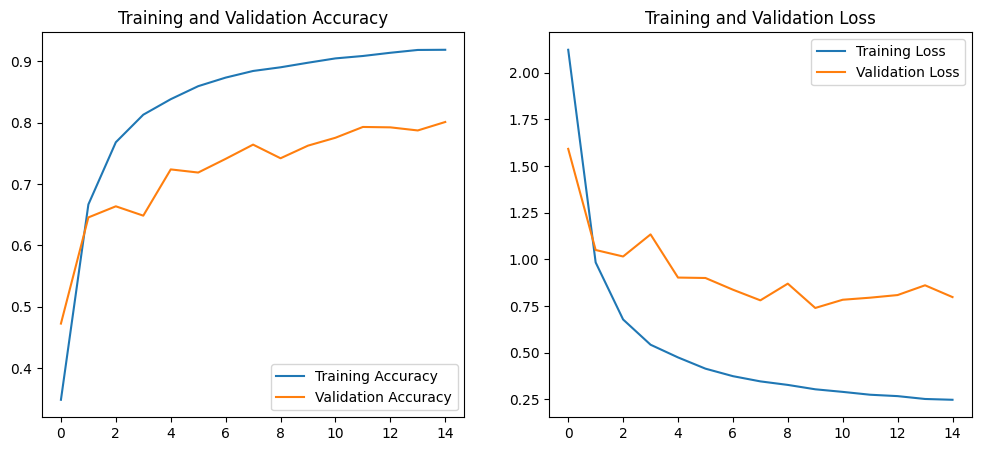

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np

# CNN Model ---


model = Sequential([
    # First Convolutional Block
    # Conv2D: Learns 32 different filters (features) of size 3x3.
    # 'relu' activation introduces non-linearity.
    
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    # MaxPooling2D: Downsamples the feature map, reducing its size by half.
    # This helps the model generalize and reduces computation.
    MaxPooling2D((2, 2)),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten the 3D feature maps into a 1D vector.
    # This prepares the data for the fully connected layers.
    Flatten(),

    # Fully Connected (Dense) Layers for Classification
    # Dense layer with 512 neurons.
    Dense(512, activation='relu'),
    # Dropout: A regularization technique that randomly sets a fraction of
    # input units to 0 at each update during training to prevent overfitting.
    Dropout(0.5),

    # Output Layer
    # The final layer has 'num_classes' neurons (29 in our case).
    # 'softmax' activation outputs a probability distribution over the classes.
    Dense(num_classes, activation='softmax')
])

# ---Compile the Model ---

model.compile(
    optimizer='adam',                          
    loss='categorical_crossentropy',           
    metrics=['accuracy']                      
)

# Print a summary of the model's architecture
model.summary()


# ---Train the Model ---

print("\nStarting model training...")


EPOCHS = 15 # Start with 8 epochs, you can increase this later for better accuracy.

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)

print("\nModel training finished.")


# ---Visualize Training History ---

# Plot the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Using the model and class indices from the previous training cell.

Loading test images from: /Users/chandu/MachineLearning_Project/Unified_mentor(internship)/Projects/My_List/ASL_detection/ASL_Data/ASL_Test/asl_alphabet_test

Loaded and preprocessed 28 test images.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

--- Classification Report ---
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         1
           B       1.00      1.00      1.00         1
           C       1.00      1.00      1.00         1
           D       1.00      1.00      1.00         1
           E       1.00      1.00      1.00         1
           F       1.00      1.00      1.00         1
           G       1.00      1.00      1.00         1
           H       1.00      1.00      1.00         1
           I       1.00      1.00      1.00         1
           J       1.00      1.00      1.00         1
           K       1.00      1.00      1.00         1
           L   

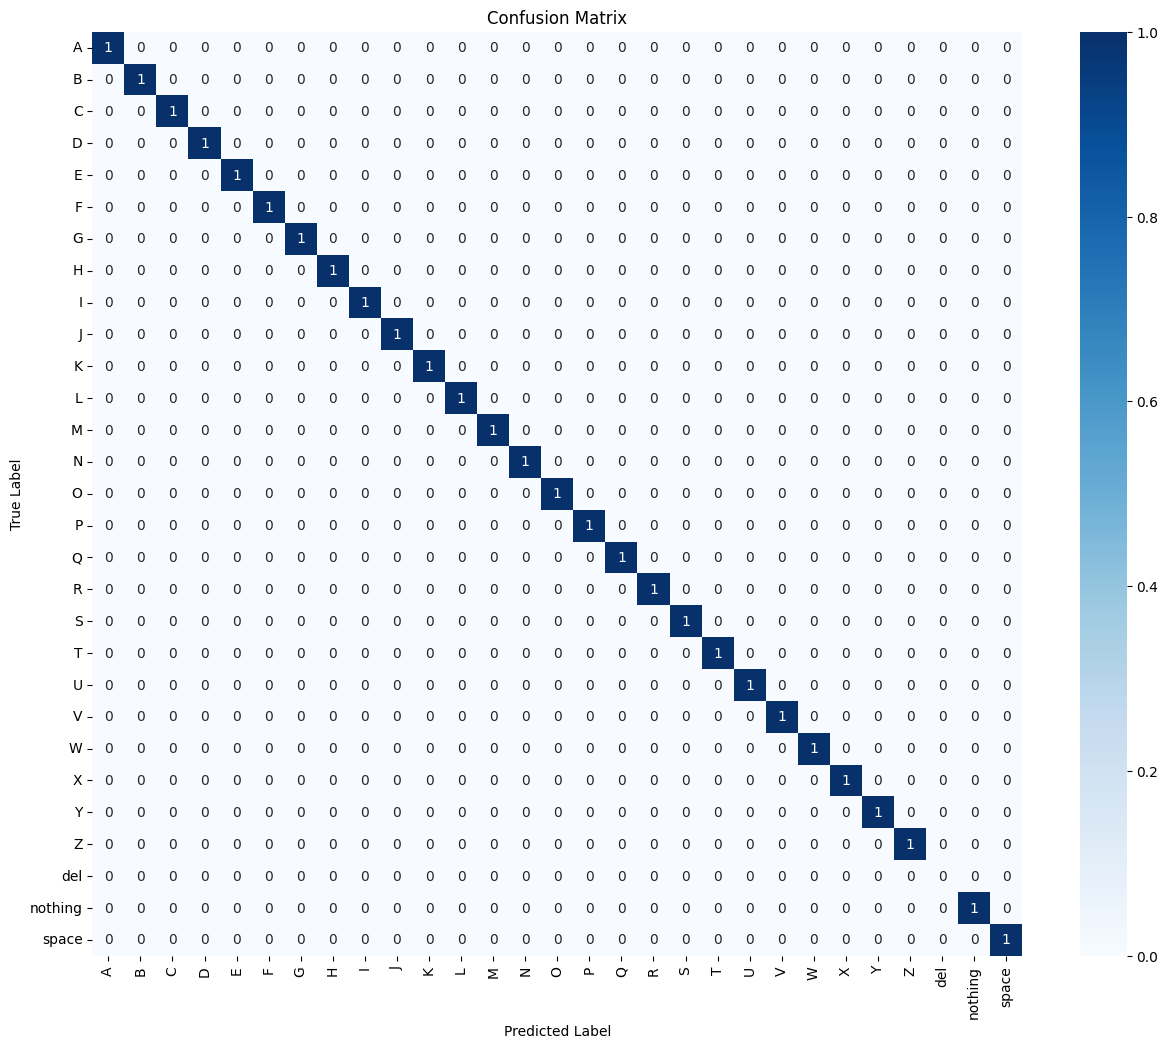

In [22]:
# Import necessary libraries
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

#Class Mappings ---

class_indices = train_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}
print("Using the model and class indices from the previous training cell.")




test_dir = '/Users/chandu/MachineLearning_Project/Unified_mentor(internship)/Projects/My_List/ASL_detection/ASL_Data/ASL_Test/asl_alphabet_test'

test_images = []
true_labels = []

print(f"\nLoading test images from: {test_dir}")


for filename in os.listdir(test_dir):
    if filename.endswith(".jpg"):
      
        label = filename.split('_')[0]
        
        # Handle potential label mismatches (e.g., 'nothing' or 'space')
        if label not in class_indices:
            if 'nothing' in filename:
                label = 'nothing'
            elif 'space' in filename:
                label = 'space'
            elif 'del' in filename:
                label = 'del'
            else:
                continue 

        # Load the image
        img_path = os.path.join(test_dir, filename)
        img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))

        # Convert the image to a numpy array and normalize it
        img_array = image.img_to_array(img)
        img_array /= 255.0

        # Add the preprocessed image and its true label to our lists
        test_images.append(img_array)
        true_labels.append(label)

print(f"\nLoaded and preprocessed {len(test_images)} test images.")


# --- 3. Make Predictions on the Test Set ---


if len(test_images) > 0:
    # Convert the lists to numpy arrays for model prediction
    test_images = np.array(test_images)
    # Convert the string labels to their corresponding integer indices
    true_labels_indices = np.array([class_indices[label] for label in true_labels])

    # Use the model to predict the class for each test image
    predictions = model.predict(test_images)
    predicted_labels_indices = np.argmax(predictions, axis=1)


    # --- 4. Generate and Display Evaluation Metrics ---

    # A) Classification Report
    print("\n--- Classification Report ---")
    class_names = list(class_indices.keys())
    #
    print(classification_report(true_labels_indices, predicted_labels_indices, target_names=class_names, labels=range(len(class_names)), zero_division=0))


    # B) Confusion Matrix
    print("\n--- Confusion Matrix ---")
    # FIXED: Added 'labels' parameter to ensure the matrix is always 29x29.
    conf_matrix = confusion_matrix(true_labels_indices, predicted_labels_indices, labels=range(len(class_names)))

    plt.figure(figsize=(15, 12))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
else:
    print("\nERROR: No test images were found. Please check the 'test_dir' path and ensure the folder contains .jpg files.")

